In [14]:
# 3.3 다차원 배열의 계산

# 1차원 배열
import numpy as np

A = np.array([1, 2, 3, 4])

print(np.ndim(A))
A.shape[0]

# 2차원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
B.shape

1
[[1 2]
 [3 4]
 [5 6]]
2


(3, 2)

In [17]:
# 행렬 곱하기

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6, ], [7, 8]])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [21]:
X = np.array([1, 2])
X.shape

W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
Y = np.dot(X, W)
print(Y)

[[1 3 5]
 [2 4 6]]
[ 5 11 17]


In [37]:

X1 = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X1.shape)
print(B1.shape)

A1 = np.dot(X1, W1) + B1
print(A1)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def identity_function(x):
    return x


Z1 = sigmoid(A1)
print(Z1)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
print(A3)

Y = identity_function(A3)
print(Y)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]
[0.31682708 0.69627909]
[0.31682708 0.69627909]


In [42]:
# 3층 신경망 구현 정리

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def identity_function(x):
    return x


def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network


def forward(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = identity_function(a3)
    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)



[0.31682708 0.69627909]


## 1층 > 2층 > 3층으로의 신호전달

1층에서 2층으로의 신호 전달
![](./images/1.png)
2층에서 3층으로 신호 전달
![](./images/2.png)


In [54]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)
print(np.sum(y)) # 소프트맥스의 출력값을 모두 더하면 1이된다.

def softmax(a):
    c = np.max(a)
    return np.exp(a -c) / np.sum(exp_a)

print(softmax(a))
print(np.sum(softmax(a)))
# 오버플로 문제 해결하기


[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
1.0
[0.00033355 0.00449084 0.01349124]
0.01831563888873418


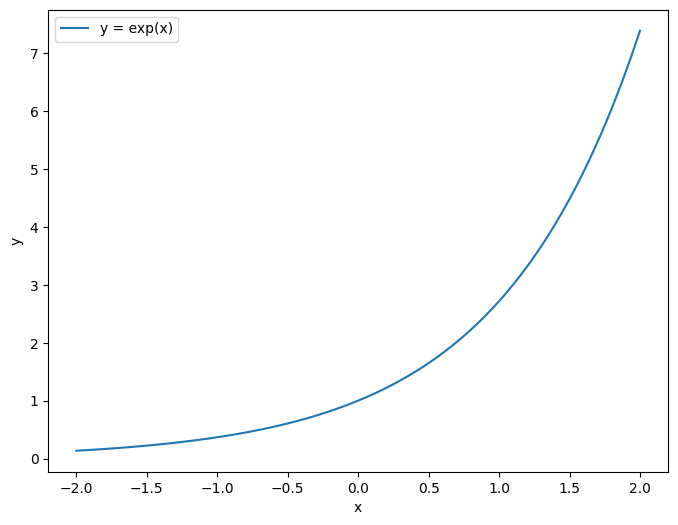

In [58]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2, 400)
y = np.exp(x)

plt.figure(figsize=(8,6))
plt.plot(x, y, label='y = exp(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()